# PANDAS BASICS

In [4]:
import numpy as np # Normalmente se importa junto a pandas
import pandas as pd

## Series
***
### pd.Series, Las series de pandas son parecidas a una lista, la gran diferencia es que las series traen un index, ya sea numerico o alguno definido por nosotros, por lo que se comportan como un diccionario clave valor.

In [5]:
"""
    Una serie de pandas es creada de la forma:
        pd.Series(data=los datos que contendra, index=opcional, por default numeros desde 0 hasta n)
"""

# Creando una serie, por ejemplo número de casos covid-19 por comuna.
comunas = ['santiago', 'independencia', 'las condes', 'providencia', 'peñalolen']
casos = np.random.randint(435, 700, 5)

covid = pd.Series(data=casos, index=comunas)
covid


santiago         564
independencia    543
las condes       496
providencia      631
peñalolen        590
dtype: int32

In [6]:
# Para crear una serie no es necesario definir el index y la data previamente, se puede hacer directamente como:
serie1 = pd.Series(data=[0,4,78,1], index=['A', 'B', 'C', 'D'])
serie1

A     0
B     4
C    78
D     1
dtype: int64

In [7]:
# Una serie se puede crear directamente desde un diccionario clave valor:
dic = {'Chile':120, 'Perú':151, 'Argentina':451, 'Bolivia':123}

serie2 = pd.Series(dic)
serie2

Chile        120
Perú         151
Argentina    451
Bolivia      123
dtype: int64

In [8]:
# Además una serie no necesariamente solo contiene números, puede ser mixta e incluso puede albergar funciones

serie3 = pd.Series(data=[3,'Hola', len, "incluso puede contener strings complejos", "al no definir un index, este se creará solo", 0.15, lambda x: x+1])
serie3

0                                              3
1                                           Hola
2                        <built-in function len>
3       incluso puede contener strings complejos
4    al no definir un index, este se creará solo
5                                           0.15
6      <function <lambda> at 0x000001D2398263A0>
dtype: object

In [9]:
# Al trabajar con series muy grandes hay built-in functions que facilitan la tarea de visualizar la serie

serie_enorme = pd.Series(np.random.rand(5000))

# Visualizando los primeros 5 datos de la serie:
print(serie_enorme.head())

print("\n--------------\n")

# Visualizando los ultimos 5 datos de la serie:
print(serie_enorme.tail())

print("\n--------------\n")

# Alguna información estadistica de la serie:
print(serie_enorme.describe())


0    0.697063
1    0.390803
2    0.006109
3    0.431009
4    0.017473
dtype: float64

--------------

4995    0.802692
4996    0.357589
4997    0.933317
4998    0.484792
4999    0.528667
dtype: float64

--------------

count    5000.000000
mean        0.500987
std         0.289280
min         0.000137
25%         0.249262
50%         0.503551
75%         0.746633
max         0.999712
dtype: float64


In [10]:
# Las series, al tener un index, los datos se pueden seleccionar de manera muy facil:
print(serie_enorme[4999])

print("\n--------------\n")

# Ademas se puede trabajar en base a ellos
serie_enorme[4999] = 100
print(serie_enorme[4999])

0.5286674724415282

--------------

100.0


In [11]:
# Además pandas trabaja de manera inteligente cuando se trata de realizar operaciones entre series
A = pd.Series(data=[10,20,30,40], index=['America', 'Europa', 'Asia', 'Oceania'])
B = pd.Series(data=[4,3,2,1], index=['Europa', 'Oceania', 'Asia', 'America'])

print(A)
print("\n--------------\n")
print(B)

print("\n--------------\n")

# Las operaciones entre series se realizan con respecto al index
C = A+B
print(C)


America    10
Europa     20
Asia       30
Oceania    40
dtype: int64

--------------

Europa     4
Oceania    3
Asia       2
America    1
dtype: int64

--------------

America    11
Asia       32
Europa     24
Oceania    43
dtype: int64


In [12]:
# Al sumar dos series que tienen index distintos, pandas rellenará con NaN que es el null de pandas
A = pd.Series(data=[10,20,30,40], index=['America', 'Europa', 'Asia', 'Oceania'])
B = pd.Series(data=[4,3,2,1], index=['Africa', 'Sur America', 'Asia', 'America'])

C = A+B
C

Africa          NaN
America        11.0
Asia           32.0
Europa          NaN
Oceania         NaN
Sur America     NaN
dtype: float64

In [13]:
"""
    Pandas permite remover las filas con NaN de manera sencilla:
         serie.dropna(axis, inplace)
             axis=0 a nivel de fila(por defecto), axis=1 a nivel de columna.
             inplace sirve para que la operacion se realize sin tener que sobre-escribir la serie, por defecto false
""" 
C.dropna(axis=0, inplace=True)
C

America    11.0
Asia       32.0
dtype: float64

## Dataframes
***
### Los dataframes de pandas son algo asi como una tabla excel pero con muchas ventajas. Los dataframes tienen integracion directa con muchas librerias

In [57]:
"""
    Un dataframe de pandas es creado de la siguiente manera:
        pd.DataFrame(data, index, columns)
"""

# Son algo asi como series divididas en columnas, normalmente el index se usa por defecto (de 0 a n)

index = ['Peñalolen', 'Lampa', 'Santiago', 'La Reina']
columnas = ['Poblacion', 'Casos Activos','Asintomaticos', 'Recuperados', 'Vacunados']

cantidad_personas = [5422, 1274, 9674, 4428]
casos_activos = [112, 25, 341, 98]
asintomaticos = [13, 2, 34, 19]
recuperados = [541, 94, 948, 246]
vacunados = [98, 13, 253, 154]

datos = [cantidad_personas, casos_activos, asintomaticos, recuperados, vacunados]
datos = np.array(datos).T # Aplicando transpuesta para que los datos tengan consistencia con sus columnas

# La transpuesta de una matriz es intercambiar las filas con las columnas.

df_covid = pd.DataFrame(data=datos, index=index,columns=columnas)
df_covid

,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
Peñalolen,5422,112,13,541,98
Lampa,1274,25,2,94,13
Santiago,9674,341,34,948,253
La Reina,4428,98,19,246,154


In [37]:
# Seleccionando datos de una fila en concreto:
df_covid.loc['Lampa']



Poblacion        1274
Casos Activos      25
Asintomaticos       2
Recuperados        94
Vacunados          13
Name: Lampa, dtype: int32

In [38]:
# Seleccionando datos de una columna en concreto:
df_covid['Vacunados']

Peñalolen     98
Lampa         13
Santiago     253
La Reina     154
Name: Vacunados, dtype: int32

In [40]:
# Buscando una fila según una informacion en concreto, ej encontrar informacion sobre quien tiene 13 vacunados:
df_covid[df_covid['Vacunados'] == 13]

,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
Lampa,1274,25,2,94,13


In [41]:
# Seleccionando data condicionalmente:
df_covid[df_covid['Vacunados'] > 20] # Las comunas con mas de 20 vacunados

,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
Peñalolen,5422,112,13,541,98
Santiago,9674,341,34,948,253
La Reina,4428,98,19,246,154


In [44]:
# Seleccionando data con multiples condiciones logicas:

# Comunas con mas de 20 vacunados y mas de 20 asintomaticos
df_covid[(df_covid['Vacunados'] > 20) & (df_covid['Asintomaticos'] > 20)] 

,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
Santiago,9674,341,34,948,253


In [42]:
# Tambien se puede evaluar el dataframe completo, se retornará una matriz logica
df_covid>25

,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
Peñalolen,True,True,False,True,True
Lampa,True,False,False,True,False
Santiago,True,True,True,True,True
La Reina,True,True,False,True,True


In [43]:
# Evaluando por columna, el resultado será una serie logica
df_covid['Vacunados']>20

Peñalolen     True
Lampa        False
Santiago      True
La Reina      True
Name: Vacunados, dtype: bool

In [46]:
# Si ya no queremos a las comunas como index y queremos establecer uno numerico:
df_covid.reset_index()

,index,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
0,Peñalolen,5422,112,13,541,98
1,Lampa,1274,25,2,94,13
2,Santiago,9674,341,34,948,253
3,La Reina,4428,98,19,246,154


In [50]:
# Si queremos anonimizar el dataframe(ocultar a que comuna pertence la informacion)

df_anonimo = df_covid.reset_index() # Estableciendo un index numerico
df_anonimo.drop('index', axis=1, inplace=True) # eliminando la columna index
df_anonimo


,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
0,5422,112,13,541,98
1,1274,25,2,94,13
2,9674,341,34,948,253
3,4428,98,19,246,154


In [61]:
# Tambien se pueden agrupar los index, en este caso las comunas

grupos = ['zona 1', 'zona 1', 'zona 2', 'zona 2']
agrupado = pd.MultiIndex.from_tuples(list(zip(grupos, comunas)))

df_covid.index = agrupado
df_covid

Poblacion  Casos Activos  Asintomaticos  Recuperados  \
zona 1 santiago            5422            112             13          541   
       independencia       1274             25              2           94   
zona 2 las condes          9674            341             34          948   
       providencia         4428             98             19          246   

                      Vacunados  
zona 1 santiago              98  
       independencia         13  
zona 2 las condes           253  
       providencia          154

In [62]:
# Al tener el dataframe indexado podemos seleccionar un grupo completo:
df_covid.xs('zona 1')

,Poblacion,Casos Activos,Asintomaticos,Recuperados,Vacunados
santiago,5422,112,13,541,98
independencia,1274,25,2,94,13


In [64]:
# Incluso podemos seleccionar los datos de un item en especifico de ese grupo
df_covid.xs(['zona 2', 'las condes'])

Poblacion        9674
Casos Activos     341
Asintomaticos      34
Recuperados       948
Vacunados         253
Name: (zona 2, las condes), dtype: int32

## Data perdida en un DataFrame
***

In [99]:
# Definiendo un DataFrame sencillo con data perdida
df_ld = pd.DataFrame({'A':[45,39,12,27],
                     'B':[2, 2, 1, 1],
                     'C':[np.nan, 51, np.nan, 62],
                     'D':[np.nan, np.nan, np.nan, 1]})
df_ld


,A,B,C,D
0,45,2,NaN,NaN
1,39,2,51.0,NaN
2,12,1,NaN,NaN
3,27,1,62.0,1.0


In [100]:
# Se pueden eliminar todas las filas con valores NaN facilmente con pandas
df_ld.dropna()
# En este caso convervará solamente la ultima fila, la cual no tiene valores nulos en alguna de sus columnas

,A,B,C,D
3,27,1,62.0,1.0


In [101]:
# Si a la funcion no se le pasa inplace=True o se sobre escribe el dataframe, los cambios no tendrán efecto
df_ld

,A,B,C,D
0,45,2,NaN,NaN
1,39,2,51.0,NaN
2,12,1,NaN,NaN
3,27,1,62.0,1.0


In [102]:
# Normalmente al trabajar con data perdida en los dataframe, las columnas con mucha data perdida simplemente se eliminan
df_ld.drop('D', axis=1, inplace=True)
df_ld

,A,B,C
0,45,2,NaN
1,39,2,51.0
2,12,1,NaN
3,27,1,62.0


In [108]:
# En el caso de la columna C el 50% de los datos están perdidos, por esta vez solucionaremos eso con respecto a los otros datos
"""
    Para "arreglar" el dataframe rellenaremos la columna C con el promedio de los datos en esta columna,
    se utilizará .fillna() para rellenar los valores nulos con alguno que nosotros estimemos
"""

df_ld['C'].fillna(value=df_ld['C'].mean(), inplace=True) # .mean() sirve para determinar el promedio
df_ld


,A,B,C
0,45,2,56.5
1,39,2,51.0
2,12,1,56.5
3,27,1,62.0


## Pandas built in plots
***

#### Pandas posee la habilidad de hacer diferentes graficos de facil manera, para esto se usará el siguiente dataframe:
https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations.csv

In [122]:
df = pd.read_csv('dataframes/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


<AxesSubplot:xlabel='country'>

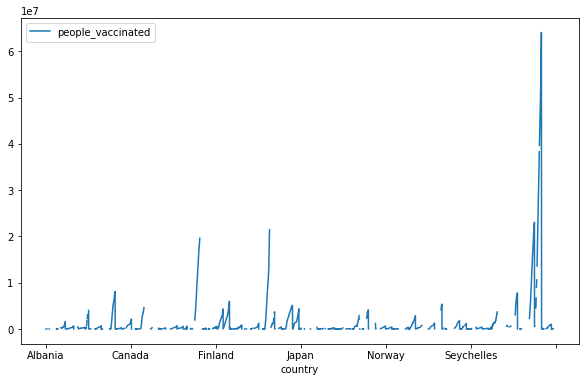

In [144]:
# Grafico de vacunas aplicadas por pais
df.plot(x='country', y='people_vaccinated', figsize=(10,6))

### Los graficos de dataframes tipo pandas normalmente se hacen con matplotlib y seaborn, por lo que, los graficos se verán mas a fondo en el siguiente notebook